In [1]:
import pandas as pd
df =  pd.read_csv('data with pos tags.csv')


In [2]:
import numpy as np

In [3]:
#Word count
lst = []
for idx,x in enumerate(df.title):
    lst.append(df.title[idx].count(" ") + 1)
df['word_count'] = lst

In [4]:
#Function for the counts
def count_pos_tags(column, tag):
    from nltk import word_tokenize, pos_tag
    lst = []
    for idx,x in enumerate(column):
        lst.append(sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith(tag)))
    return lst

In [5]:
#Number of modals
modal_count = count_pos_tags(df.title, 'MD')
df['modal_count'] = modal_count

In [6]:
#Number of verbs
vcount = count_pos_tags(df.title, 'VB')
df['verb_count'] = vcount

In [7]:
#Number of adjectives
jcount = count_pos_tags(df.title, 'JJ')
df['adjective_count'] = jcount

In [8]:
#Number of adverbs
acount = count_pos_tags(df.title, 'RB')
df['adverb_count'] = acount

In [9]:
#Number of proper nouns
pncount = count_pos_tags(df.title, 'NNP')
df['proper_noun_count'] = pncount

In [ ]:
past_particle_verb = count_pos_tags(df.title, 'VBN')
df['past_particle'] = past_particle_verb
past_tense_verb = count_pos_tags(df.title, 'VBD')
df['past_tense_verb'] = past_tense_verb
df['past_verb'] = df['past_particle'] + df['past_tense_verb']

df = df.drop(['past_particle', 'past_tense_verb'],axis = 1)

In [10]:
#Number of total nouns (including proper_nouns)
ncount = count_pos_tags(df.title, 'NN')



In [11]:
#Number of nouns
nouns = abs(np.subtract(np.array(pncount), np.array(ncount)))
df['noun_count'] = nouns

In [12]:
df['emotiveness'] = (df['adjective_count']+ df['adverb_count']) / (df['noun_count'] + df['verb_count'])

In [13]:
df['modifiers']  = df['adjective_count'] + df['adverb_count']

In [14]:
df.to_csv('pos tags, counts, emotiveness.csv', index = False)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

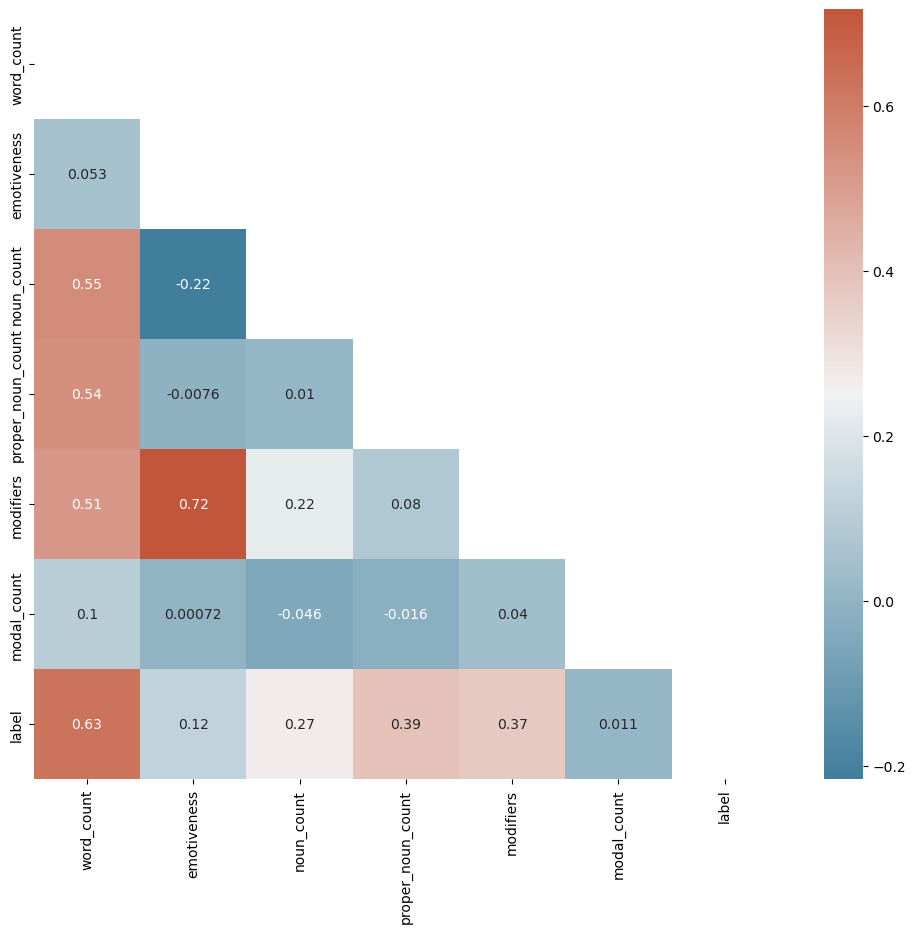

In [23]:
X = df.loc[:,['word_count', 'emotiveness', 'noun_count', 'proper_noun_count', 'modifiers', 'modal_count', 'label']]
corr = X.corr()
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)